Nama : ahmad Mustamin

Nim  : F55120006


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Mengimport Library

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

###membagi data

In [ ]:
# Menentukan path dari dataset untuk training dan dataset untuk validasi
train_dir = '/content/drive/MyDrive/Data Deep Learning/vgg16_data/train'
validation_dir = '/content/drive/MyDrive/Data Deep Learning/vgg16_data/test'

train_data_mobil = os.listdir(train_dir + '/mobil/')
train_data_motor = os.listdir(train_dir + '/motor/')

###menampilkan data training

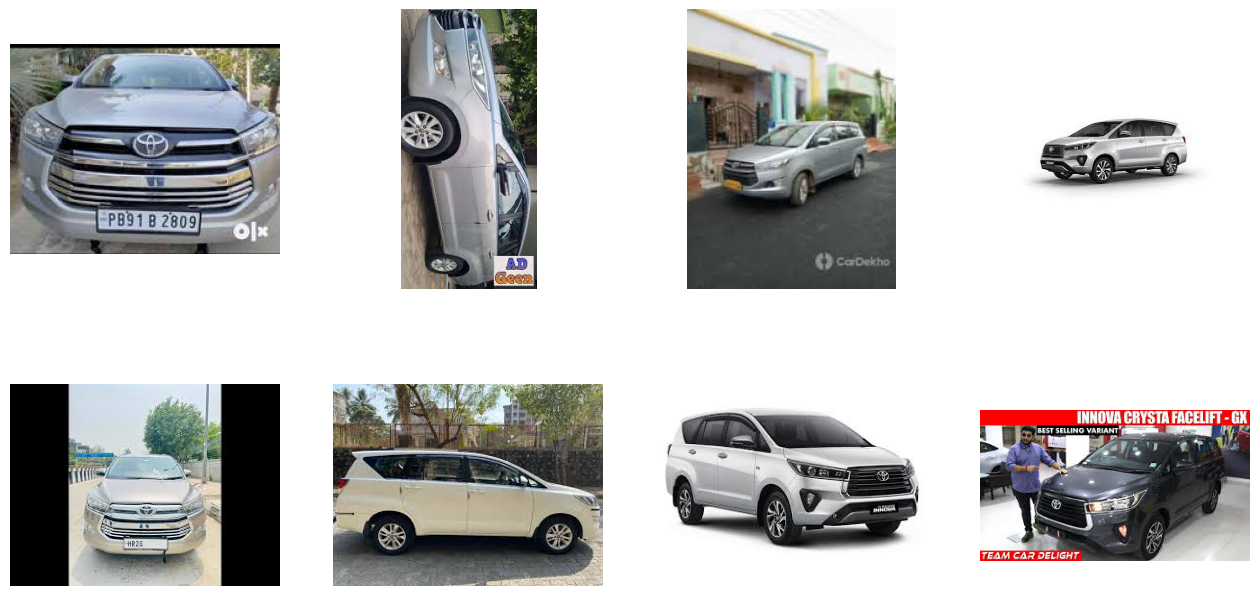

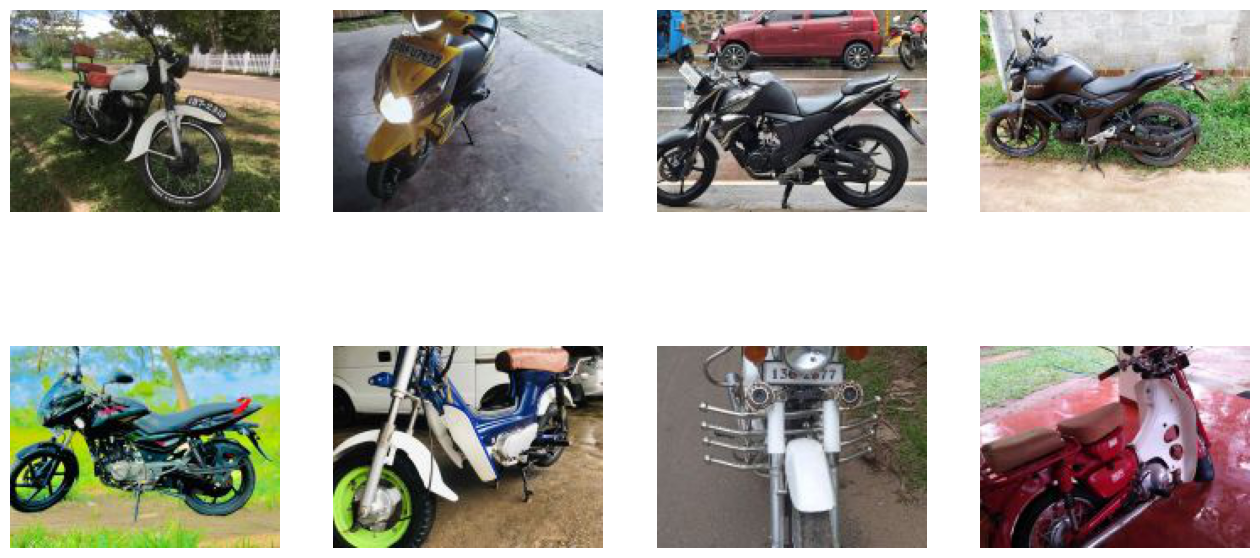

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

next_cats_pic = train_data_mobil[:8]
next_dogs_pic = train_data_motor[:8]

for i, img_path in enumerate(next_cats_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/mobil/' + img_path)
  plt.imshow(img)
plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)

for i, img_path in enumerate(next_dogs_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2, 4, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(train_dir + '/motor/' + img_path)
  plt.imshow(img)
plt.show()


###Preprocessing Data

In [ ]:
# Melakukan image augmentation pada dataset untuk menambah variasi data
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=60,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Melakukan data generator untuk membaca dataset training di setiap label
batch_size = 32
img_height = 224
img_width = 224
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary', 
                                                    target_size=(img_height, img_width))     

# Melakukan data generator untuk membaca dataset testing di setiap label
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=batch_size,
                                                         class_mode='binary', 
                                                         target_size=(img_height, img_width))

train_generator.class_indices

Found 404 images belonging to 2 classes.
Found 211 images belonging to 2 classes.


{'mobil': 0, 'motor': 1}

###Membangun model

In [ ]:
# Membangun model VGG16
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Menampilkan struktur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

###Melatih Model

In [7]:
# Mengkompilasi dan melatih model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
epochs = 10
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size)


Epoch 1/10
12/12 [==============================] - 1056s 87s/step - loss: 0.9982 - accuracy: 0.6022 - val_loss: 0.7386 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 1021s 88s/step - loss: 0.6813 - accuracy: 0.5968 - val_loss: 0.7157 - val_accuracy: 0.4635
Epoch 3/10
12/12 [==============================] - 1012s 85s/step - loss: 0.6802 - accuracy: 0.5914 - val_loss: 0.7093 - val_accuracy: 0.4844
Epoch 4/10
12/12 [==============================] - 1004s 84s/step - loss: 0.6820 - accuracy: 0.5806 - val_loss: 0.7208 - val_accuracy: 0.4896
Epoch 5/10
12/12 [==============================] - 994s 84s/step - loss: 0.6783 - accuracy: 0.5938 - val_loss: 0.7109 - val_accuracy: 0.4792
Epoch 6/10
12/12 [==============================] - 968s 82s/step - loss: 0.6763 - accuracy: 0.5914 - val_loss: 0.7241 - val_accuracy: 0.4531
Epoch 7/10
12/12 [==============================] - 969s 82s/step - loss: 0.6793 - accuracy: 0.5887 - val_loss: 0.7282 - val_accuracy: 0.4635
Ep

###Evaluasi

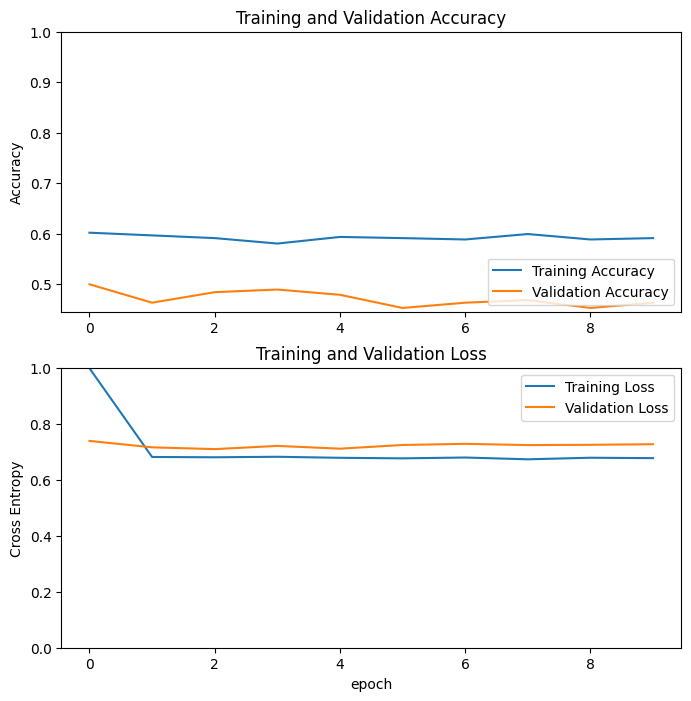

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Saving 1636033932243_Honda Dio 2017 Motorbike.jpg to 1636033932243_Honda Dio 2017 Motorbike.jpg


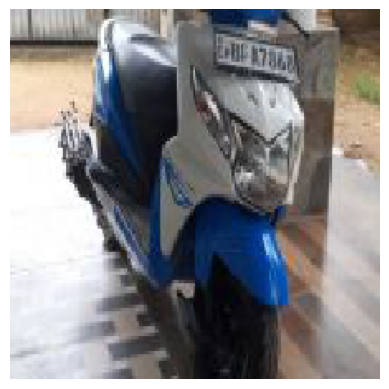

1/1 [==============================] - 1s 687ms/step

 ini adalah motor


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(img_height, img_width, 3))
  x = image.img_to_array(img)

  plt.imshow(x/255.)
  plt.axis('off')
  plt.show()

  x = np.expand_dims(x, axis=0)
  classes = model.predict(x)
  
  if classes[0] < 0.5:
    print("\n ini adalah mobil")
  else:
    print("\n ini adalah motor")

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Mendefinisikan direktori dataset training dan testing
# train_dir = '/Users/uusaamaa_/PycharmProjects/DeepLearningClusterMobil/dataset_Train'
# test_dir = '/Users/uusaamaa_/PycharmProjects/DeepLearningClusterMobil/dataset_Test'

train_dir = '/content/drive/MyDrive/Data Deep Learning/vgg16_data/train'
test_dir = '/content/drive/MyDrive/Data Deep Learning/vgg16_data/test'

# Preprocessing dan augmentasi data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing data testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Mengatur batch size dan ukuran gambar
batch_size = 32
image_size = (224, 224)  # Ukuran input yang diharapkan oleh VGG16

# Memuat data training
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Menggunakan class_mode binary karena hanya ada 2 kelas (mobil dan motor)
)

# Memuat data testing
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Membangun model menggunakan arsitektur VGG16
model = Sequential()

# Lapisan konvolusi pertama
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(image_size[0], image_size[1], 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Lapisan konvolusi kedua
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Lapisan konvolusi ketiga
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Lapisan konvolusi keempat
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Lapisan konvolusi kelima
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Menggunakan sigmoid karena hanya ada 2 kelas (mobil dan motor)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menentukan jumlah batch per epoch
steps_per_epoch = train_data.samples // batch_size

# Melatih model
history = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_data
)



7/7 [==============================] - 1s 122ms/step - loss: 0.7253 - accuracy: 0.4739


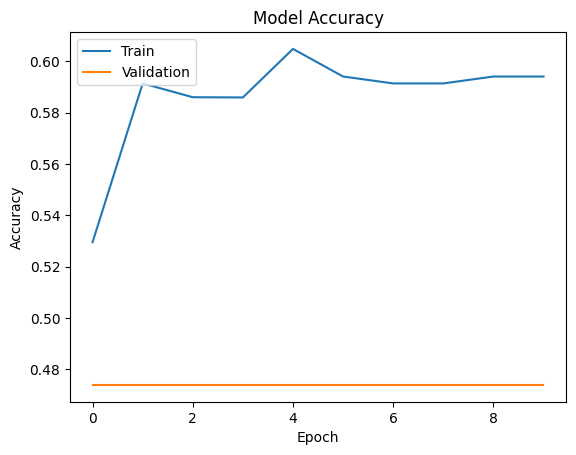

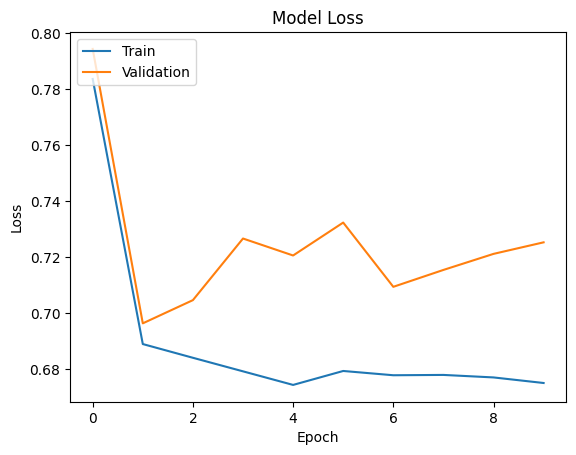

In [ ]:
# Evaluasi model pada data testing
test_loss, test_acc = model.evaluate(test_data)

# Plot akurasi dan loss training dan validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [ ]:
# Prediksi gambar pada data testing
predictions = model.predict(test_data)
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

# Menampilkan hasil prediksi
class_names = ['motor', 'mobil']
plt.figure(figsize=(10, 10))
for i in range(len(test_data.filenames)):
    img = plt.imread(test_data.filenames[i])
    plt.subplot(5, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    true_label = test_data.labels[i]
    predicted_label = predicted_labels[i]
    plt.title(f'True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}')
plt.show()

NameError: ignored